# Part I - Exploration of Ford go bike trip data
## by Apeh Victor

## Introduction
> The dataset contains information about a bike share service. It contains 183412 entries and has fourteen variables. Some of the important ones include
* duration_sec: The duration of the bike share in seconds.
* start_time: The beginning of the duration.
* end_time: The end of the duration.
* start_station_latitude: The latitude of the starting station
* start_station_longitude: Longitude of the starting station.
* end_station_latitude: Latitude of the endind station
* end_station_longitude: Longitude of the ending station
* user_type: The user of the type between customer and subscriber
* member_birth_year: The year which the user was born
* member_gender: The gender of the user between Male, Female and Other



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data wrangling

> I am creating this section in order to perform some data wrangling steps.

In [7]:
df_clean = df.copy()

#### extract start day from start date

In [8]:
df_clean['start_day'] = df_clean['start_time'].str.extract('........(..).+')

In [9]:
df_clean['start_day'] = [i[1]  if i[0]=='0' else i for i in df_clean['start_day']]

> I want to see if some days are more popular than others for getting a bike

#### Drop rows with missing data(Missing data cannot be accessed)

In [10]:
df_clean = df_clean.dropna()
df_clean.reset_index(drop = True,inplace = True)

#### Clean up datatypes

In [11]:
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time']=pd.to_datetime(df_clean['end_time'])
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(int)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(int)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### calculate distance from longitudes and lattitudes (in miles)

In [13]:
def dist_calc(start_lat,start_long,end_lat,end_long):
    distance = []
    lat1 = [i/(180/np.pi) for i in start_lat]
    long1 = [i/(180/np.pi) for i in start_long]
    lat2 = [i/(180/np.pi) for i in end_lat]
    long2 = [i/(180/np.pi) for i in end_long]
    length = len(lat1)
    for i in range(length):
        dist = 3963.0 * np.arccos((np.sin(lat1[i]) * np.sin(lat2[i])) + np.cos(lat1[i]) * np.cos(lat2[i]) * np.cos(long2[i] - long1[i]))
        distance.append(dist)
    return distance


In [14]:
df_clean['distance'] = dist_calc(df_clean.start_station_latitude,df_clean.start_station_longitude,df_clean.end_station_latitude,df_clean.end_station_longitude)

C:\Users\Sky\AppData\Local\Temp\ipykernel_4960\182383663.py:9: RuntimeWarning: invalid value encountered in arccos
  dist = 3963.0 * np.arccos((np.sin(lat1[i]) * np.sin(lat2[i])) + np.cos(lat1[i]) * np.cos(lat2[i]) * np.cos(long2[i] - long1[i]))


### Find age from birthyear column

> since the data was collected in 2019 I will be using 2018 to get the age of the customer the data only includes February and March and will not give accurate age for those who don't have their birthdays in that time period

In [15]:
df_clean['age'] = df_clean['member_birth_year'].apply(lambda x:2018 - x)

In [16]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'distance', 'age'],
      dtype='object')

In [17]:
df_work = df_clean[['duration_sec','start_time', 'end_time','start_station_id','end_station_id','user_type','member_gender', 'bike_share_for_all_trip',
       'start_day', 'distance', 'age']]

### What is the structure of your dataset?

> The data contains 183412 entries. It includes variables such as the duration of the ride, the start and end times, the longitudes and latitudes of the starting and ending points and the age and sex of the user. I have created new features such as distance, start_day and age from the original variables.

### What is/are the main feature(s) of interest in your dataset?

> I believe the most important feature is the duration since bikers are charged per duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that age and user type and distance might be important to the investigation

## Univariate Exploration

#### Let's look at the duration_sec variable

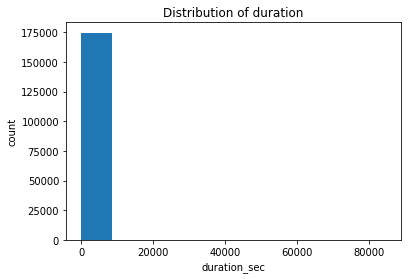

In [18]:
plt.hist(df_work.duration_sec);
plt.xlabel('duration_sec')
plt.ylabel('count');
plt.title('Distribution of duration');
#The plot shows that there are outliers or a significant skew

> let's use only values that are less that the 99th percentile

In [19]:
percent_99 = np.percentile(df_work['duration_sec'],99)
percent_99

3176.0

In [20]:
df_work['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

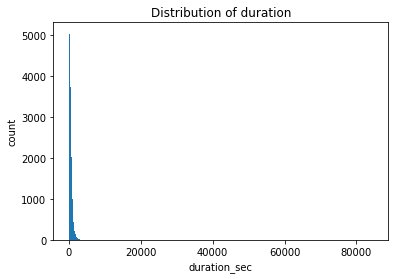

In [21]:
dats = df_work[df_work['duration_sec'] < percent_99]
bins = np.arange(0,84548+20,20)
plt.hist(data = dats,x = 'duration_sec',bins = bins);
plt.xlabel('duration_sec')
plt.ylabel('count');
plt.title('Distribution of duration');

>The duration seems to be skewed, I will apply a log transformation on the x-axis

In [22]:
def log_trans(x,into_log = True):
    if into_log == True:
        x = np.log(x)
    elif into_log == False:
        x = 10**x
    return x

In [23]:
df_work['duration_sec'].apply(log_trans).describe()

count    174952.000000
mean          6.234995
std           0.702727
min           4.110874
25%           5.777652
50%           6.234411
75%           6.670766
max          11.345075
Name: duration_sec, dtype: float64

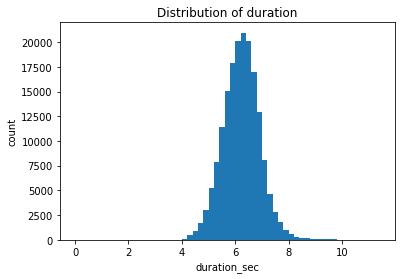

In [24]:
bins = np.arange(0,11.345075 + 0.2,0.2)
plt.hist(x = df_work['duration_sec'].apply(log_trans),bins = bins);
plt.xlabel('duration_sec')
plt.ylabel('count');
plt.title('Distribution of duration');

> A log transform on the x axis shows that though the distribution is skewed it is normally distributed 

#### Investigation of the age variable

In [25]:
df_work['age_group'] = pd.cut(df_work['age'],bins = [0,21,41,61,150],labels = ['<20','20-40','41-60','>60'])

C:\Users\Sky\AppData\Local\Temp\ipykernel_4960\3470126637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work['age_group'] = pd.cut(df_work['age'],bins = [0,21,41,61,150],labels = ['<20','20-40','41-60','>60'])


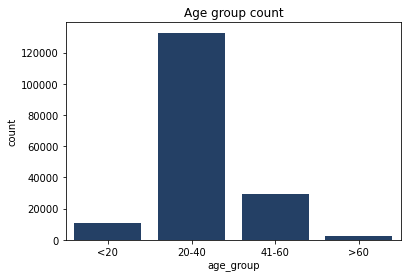

In [26]:
sb.countplot(data = df_work,x='age_group',color = '#193f70')
plt.title('Age group count');

> Those between the ages 20 to 40 take more bikes than any group and those greater than 60 use the service the least, this might reflect when age groups are compared to distance and duration later on

##### Lets see the age distribution

In [27]:
df_work.age.describe()

count    174952.000000
mean         33.196865
std          10.118731
min          17.000000
25%          26.000000
50%          31.000000
75%          38.000000
max         140.000000
Name: age, dtype: float64

In [28]:
bins = np.arange(0,140+5,5)

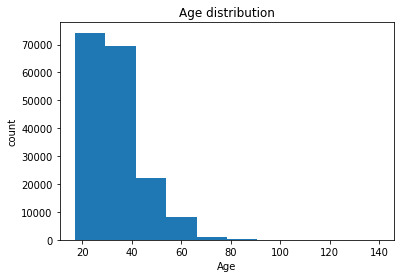

In [29]:
plt.hist(df_work.age,bins = 10);
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age distribution');

> From the histogram, the age group 20-40 has the highest number of ocurrences and this explains the countplot, but inorder to get more details i will compare the age distribution with the duration to know who actually brings in more revenue assuming expenses are paid on the duration 

#### start_day

In [30]:
order = df_work.start_day.value_counts(ascending=False).index

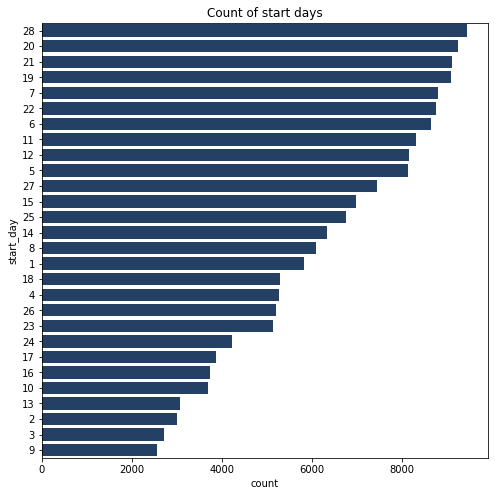

In [31]:
plt.figure(figsize=(8,8))
sb.countplot(data = df_work, y='start_day',order = order,color='#193f70');
plt.title('Count of start days');

>The last day recorded has the highest number of entries, this might be interesting to look into, for example how are the durations related to the days of the month

#### user info

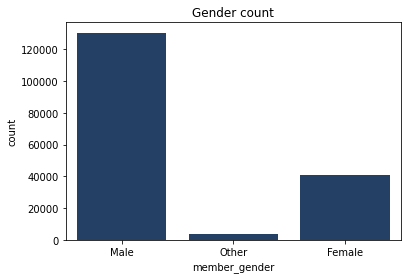

In [32]:
sb.countplot(x=df_work.member_gender,color = '#193f70');
plt.title('Gender count');

> There are more male users than females, we will have to see how this relates to the duration

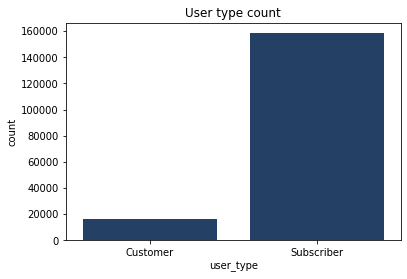

In [33]:
sb.countplot(x=df_work.user_type,color = '#193f70');
plt.title('User type count');

> Subscriber makes up the largest amount of users and the males seem to be far more than any other gender

#### distribution of distance varible

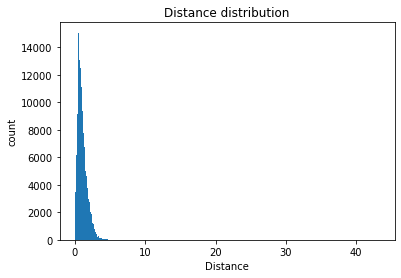

In [34]:
bins = np.arange(0,43.212+0.1,0.1)
plt.hist(df_work.distance,bins=bins);
plt.xlabel('Distance')
plt.ylabel('count')
plt.title('Distance distribution');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* duration variable was skewed and so i carried out a log transformation to be able to scale the data for visualisation
* the distribution of the age variable shows that the younger generation is more represented by the data than the older

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration_sec variable contained outliers that greatly skewed the data, I had to apply a log transform after removing these outliers to be able to get a clear picture of the variable. 

## Bivariate Exploration

#### Comparison of user type with distance and duration

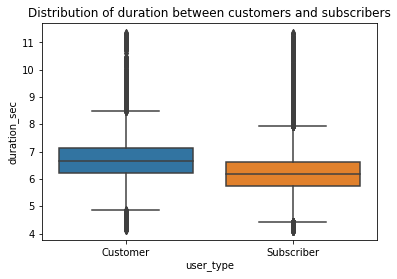

In [35]:
sb.boxplot(data=df_work,x='user_type',y=df_work['duration_sec'].apply(log_trans));
plt.title('Distribution of duration between customers and subscribers');

> even though there are more subscribers than customers, customers have a higher duration on average

> let's look at this further, I believe the distance covered may help us understand this phenomenon

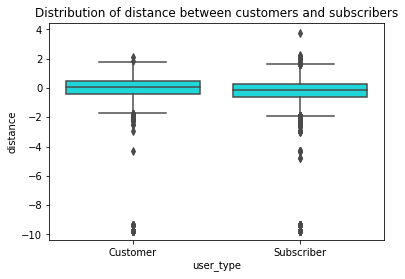

In [36]:
sb.boxplot(data=df_work,x='user_type',y=df_work['distance'].apply(log_trans), color = '#00f6f7');
plt.title('Distribution of distance between customers and subscribers');

> seems that on average, the distance covered by the customers was a bit more than the distance covered by the subscribers

#### Comparison of age group with distance, duration, gender, usertype

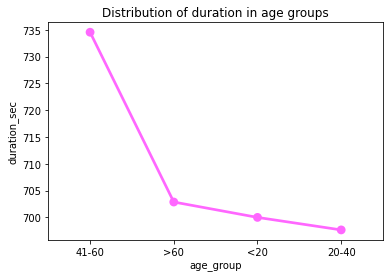

In [37]:
ans = df_work.groupby('age_group').mean().reset_index()
sol = ans.sort_values(by = 'duration_sec',ascending = False)
sb.pointplot(data = sol , x='age_group',y = 'duration_sec',order = sol.age_group,color = '#ff67ff')
plt.title('Distribution of duration in age groups');

> The point plot shows that  the most duration spent is the age group 40-60 and the age group 20-40 the least

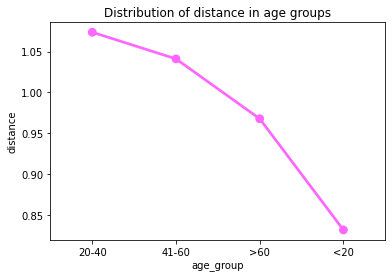

In [38]:
ans = df_work.groupby('age_group').mean().reset_index()
sol = ans.sort_values(by = 'distance',ascending = False)
sb.pointplot(data = sol , x='age_group',y = 'distance',order = sol.age_group,color = '#ff67ff');
plt.title('Distribution of distance in age groups');

> The pointplot shows something very interesting, the age group greater than 60 and those less than 20, which in a normal population distribution will be considered the children and aged cover the least distances and 20-40 which actually has the least duration covered the most distance. This deserves to be explored further.

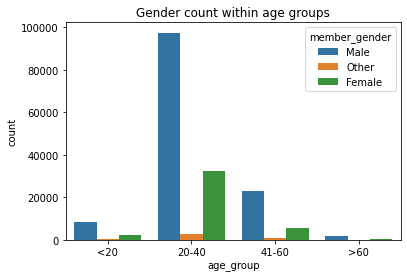

In [39]:
sb.countplot(data = df_work, x='age_group', hue = 'member_gender');
plt.title('Gender count within age groups');

> The age distribution to gender plot shows us that the males are the most represented gender across all age groups, and reflects the distribution of the total data.

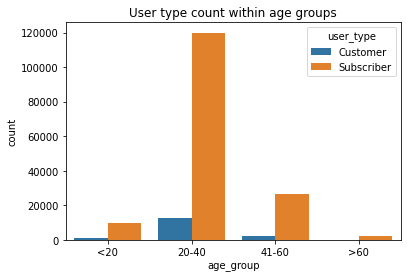

In [40]:
sb.countplot(data = df_work, x='age_group', hue = 'user_type');
plt.title('User type count within age groups');

> We can see that there more subscribers than customers in all age groups and that the plot mirrors taht of gender against age group above

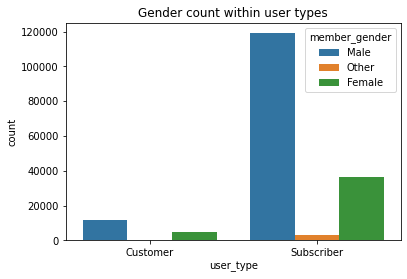

In [41]:
sb.countplot(data = df_work, x='user_type', hue = 'member_gender');
plt.title('Gender count within user types');

> There are more males in all user types.

#### Understanding the relationship between distance and duration

In [42]:
df_work.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [43]:
bin_edges = [61,323,510,789,84548]
df_work['duration_split'] = pd.cut(df_work.duration_sec, bins = bin_edges, labels = ['min_duration','min-ave','ave_duration','max_duration'])

C:\Users\Sky\AppData\Local\Temp\ipykernel_4960\2277020844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work['duration_split'] = pd.cut(df_work.duration_sec, bins = bin_edges, labels = ['min_duration','min-ave','ave_duration','max_duration'])


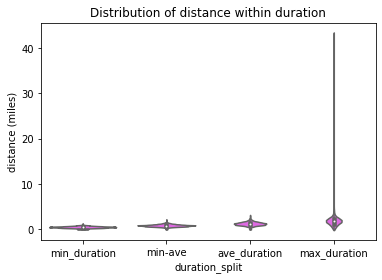

In [44]:
sb.violinplot(data = df_work, x = 'duration_split', y='distance', color = '#f056f6')
plt.ylabel('distance (miles)')
plt.title('Distribution of distance within duration');

> an outlier at max duration is making the plot difficult to understand, let's use only distances below 30

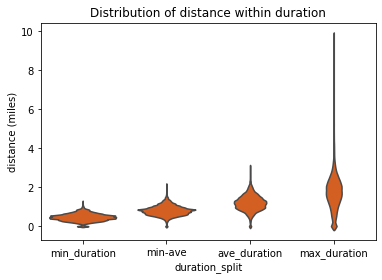

In [45]:
dats = df_work[df_work['distance'] < 40]
sb.violinplot(data = dats, x = 'duration_split', y='distance',color = '#f05606', inner = None)
plt.ylabel('distance (miles)')
plt.title('Distribution of distance within duration');

> let's use a boxplot to make the trend easier to understand

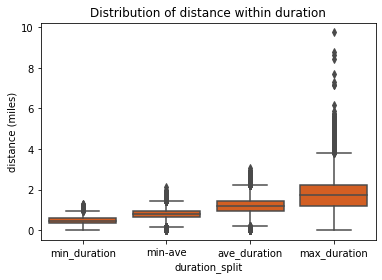

In [46]:
dats = df_work[df_work['distance'] < 40]
sb.boxplot(data = dats, x = 'duration_split', y='distance',color = '#f05606')
plt.ylabel('distance (miles)')
plt.title('Distribution of distance within duration');

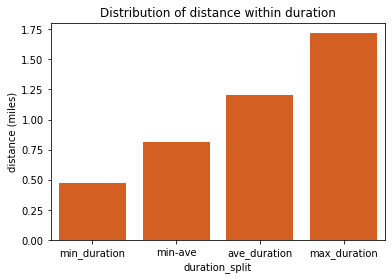

In [47]:
#A bar plot will make the trend much clearer
imp = (df_work.groupby('duration_split').mean().reset_index())
sb.barplot(data = imp, x = 'duration_split',y='distance',color = '#f05606')
plt.ylabel('distance (miles)')
plt.title('Distribution of distance within duration');

> Distance increse with increase in duration

#### Relationship between startday and duration

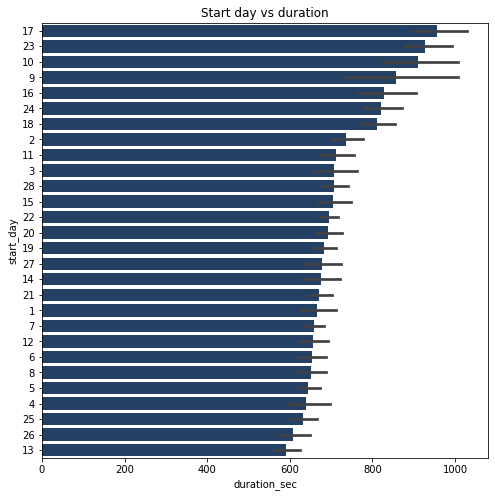

In [48]:
order = df_work.groupby('start_day').mean().sort_values(by='duration_sec',ascending=False).index
plt.figure(figsize=(8,8))
sb.barplot(data = df_work, y='start_day',x='duration_sec',order = order,color='#193f70');
plt.title('Start day vs duration');

> The 17th had the longest durations on average in February 2019

#### Relationship between gender and duration

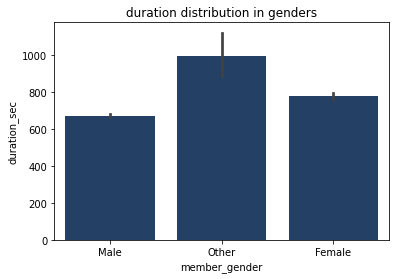

In [49]:
sb.barplot(data = df_work, x = 'member_gender', y= 'duration_sec',color='#193f70')
plt.title('duration distribution in genders');

> It is surprising that even though the count of males is larger than the other two, it has the least duration on average

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* I observed that customers spend a larger duration on average than subscribers
* There is a sharp difference between the duration of the generation below 60 and those above
* There is an increase in distance with larger durations, this makes sense since a longer duration should mean the user has a farther distance to go.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The age groups between 20-60 covered more distance on average than those less than 20 and those greater than 60
* Customers also go a larger distance than subscribers on average
* overall more men use use the bikes but still spend the least *(if payment is done on a duration basis)* due to lower durations.
* There are more customers than subscribers in the age groups

## Multivariate Exploration

#### Relationship between duration, distance and age group

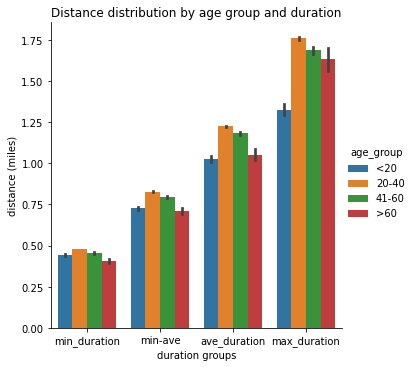

In [51]:
dats = df_work[df_work['distance'] < 40]
sb.catplot(data = dats, x = 'duration_split', y='distance',hue='age_group', kind = 'bar');
plt.xlabel('duration groups')
plt.ylabel('distance (miles)');
plt.title('Distance distribution by age group and duration');

> The increase of duration with distance is clear across age_groups is clearly visible. And also the trend where the least distances covered per duration are the age groups <20 and >60 is repeated in this graph.

#### Relationship between duration, usertype and age group

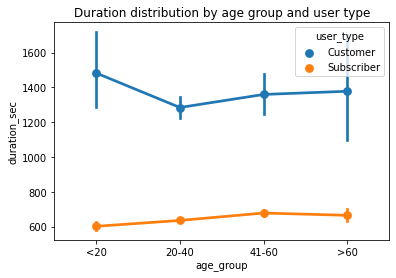

In [52]:
sb.pointplot(data = df_work , x='age_group',y = 'duration_sec', hue = 'user_type',order=['<20','20-40','41-60','>60']);
plt.title('Duration distribution by age group and user type');

> Average duration of the subcribers is lower than those of customers across all ages even though there are more subscibers than customers.

#### Relationship between duration, distance, age group and usertype

In [53]:
dats = df_work.groupby(['age_group','user_type']).mean().reset_index()
dats

,age_group,user_type,duration_sec,distance,age
0,<20,Customer,1482.522951,0.890255,19.562295
1,<20,Subscriber,601.325514,0.824602,19.798905
2,20-40,Customer,1284.368014,1.213989,30.421871
3,20-40,Subscriber,635.053569,1.058628,30.180244
4,41-60,Customer,1359.398110,1.176295,49.142564
5,41-60,Subscriber,677.597581,1.028692,49.135463
6,>60,Customer,1377.781513,0.959994,68.831933
7,>60,Subscriber,664.369909,0.968323,69.092477


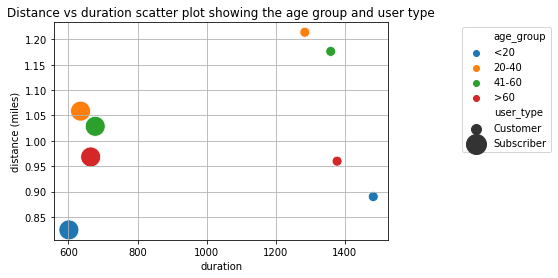

In [54]:
sb.scatterplot(data = dats, x ='duration_sec',y = 'distance',hue = 'age_group',size = 'user_type',sizes = [100,400])
plt.legend(bbox_to_anchor=(1.5,1))
plt.xlabel('duration')
plt.ylabel('distance (miles)')
plt.title('Distance vs duration scatter plot showing the age group and user type');
plt.grid()

> The plot above can be devided into four quadrants, at the top left we have low duration and high distance, to right is the highh duration and large distance, the bottom left is the low duration and small distance and the bottom right with large duration and small distance. Firstly we see that subscribers have the least duration and so are on the left and customers the most duration on the right. The trend of the age groups >60 and < 20 which we have been following is repeated with both covering the least distance in both cases of customers and subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part the trend of duration increasing with distance was clear accross age_groups and the age groups >60 and <20 coverig the least distances is supported.


### Were there any interesting or surprising interactions between features?

> Yes actually, even though the count for the subscribers was far larger than the customers, customers used more duration and covered more distance on average.

## Conclusions
> The plots above help us to understand that even with a large number of subscribers, the company should focus on customers since there spend a larger duration on average. The ages 40-60 are also cover larger distances than the other age groups on average.
> It is also clear that even the age groups >60 and <20 which are on the high side have lower distances with high durations meaning that they might be covering large distances but with more time, which makes sense since this would include a very young and somewhat old generations.he data exploration.
##### In conclusion we can say that the bike share profits most from 
* The age groups 20-60
* The genders other and females
* Customers rather than subscribers



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [ ]:
df_work.to_csv("cleaned_dataset.csv",index=False)